In [20]:
import pandas as pd

# Load the dataset to analyze its content
file_path = "C:\\Users\\nivii\\Downloads\\greendestination (1) (1).csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
# Calculate the attrition rate
total_employees = len(data)
attrition_count = data['Attrition'].value_counts()['Yes']
attrition_rate = (attrition_count / total_employees) * 100

attrition_rate


16.122448979591837

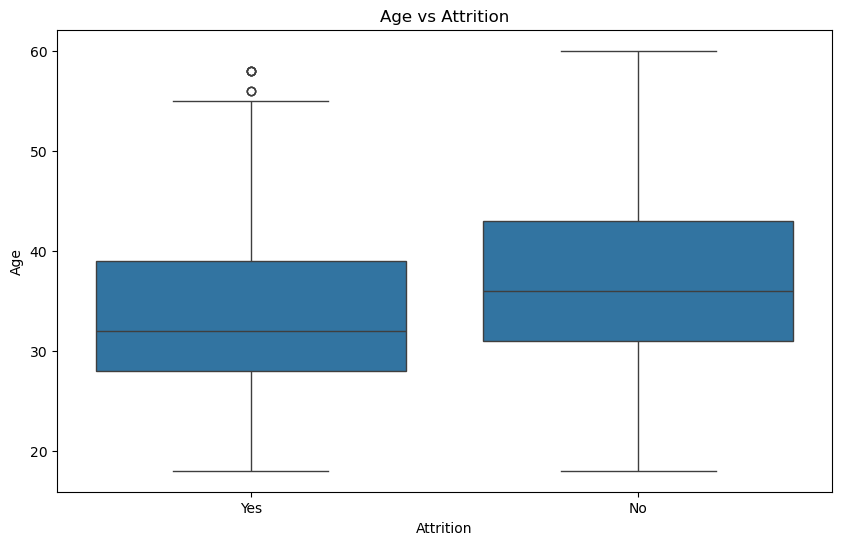

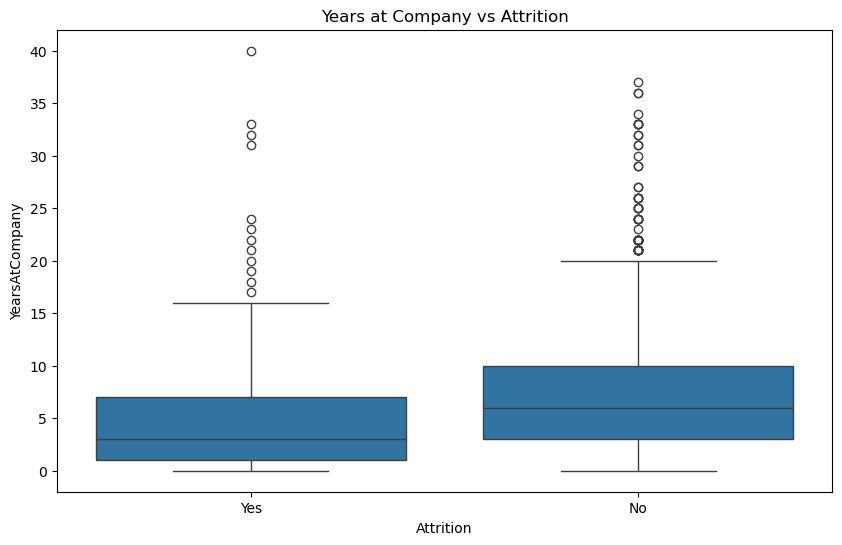

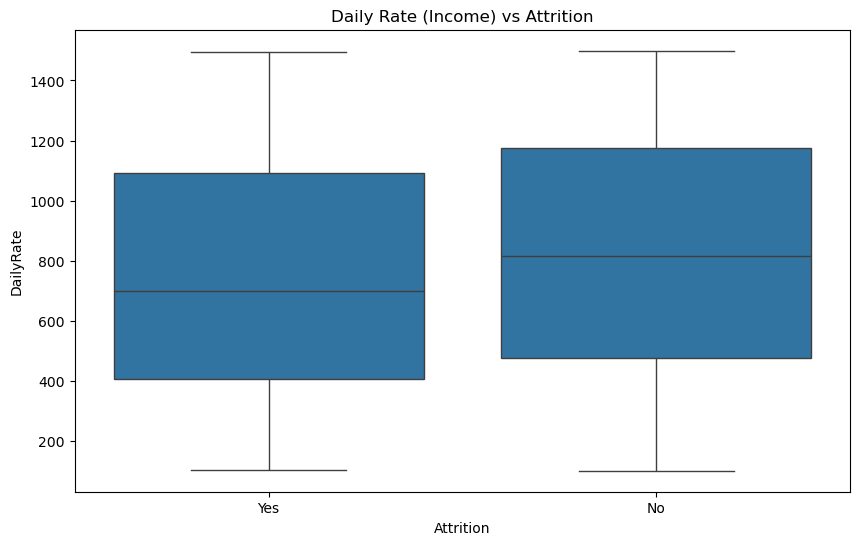

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Attrition' to binary for easier analysis
data['AttritionBinary'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot Age vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Age vs Attrition')
plt.show()

# Plot YearsAtCompany vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.title('Years at Company vs Attrition')
plt.show()

# Plot DailyRate (Income) vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DailyRate', data=data)
plt.title('Daily Rate (Income) vs Attrition')
plt.show()


In [25]:
from scipy import stats

# Perform t-tests to check for statistically significant differences in means

# Age vs Attrition
age_attrition_ttest = stats.ttest_ind(
    data[data['AttritionBinary'] == 1]['Age'], 
    data[data['AttritionBinary'] == 0]['Age']
)

# YearsAtCompany vs Attrition
years_at_company_ttest = stats.ttest_ind(
    data[data['AttritionBinary'] == 1]['YearsAtCompany'], 
    data[data['AttritionBinary'] == 0]['YearsAtCompany']
)

# DailyRate vs Attrition
daily_rate_ttest = stats.ttest_ind(
    data[data['AttritionBinary'] == 1]['DailyRate'], 
    data[data['AttritionBinary'] == 0]['DailyRate']
)

age_attrition_ttest, years_at_company_ttest, daily_rate_ttest


(TtestResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10, df=1468.0),
 TtestResult(statistic=-5.1963086670254235, pvalue=2.3188716103863036e-07, df=1468.0),
 TtestResult(statistic=-2.1740836777017747, pvalue=0.02985816066026497, df=1468.0))